In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Read Image Files

In [2]:
img = Image.open("car2.png")
img = img.convert("RGB")

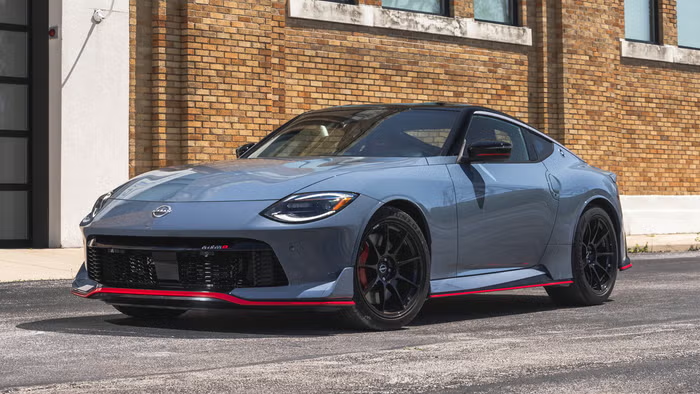

In [3]:
img

In [4]:
d = img.getdata()

In [5]:
d

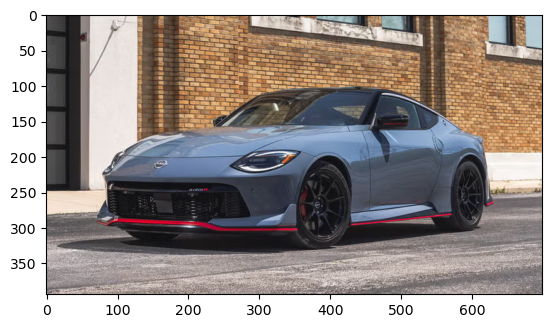

In [6]:
plt.imshow(img)
plt.show()

In [7]:
#Get pixel data for each channel
M = np.asarray(img)

In [8]:
M

array([[[ 96,  94,  95],
        [ 97,  95,  96],
        [ 99,  97,  98],
        ...,
        [180, 203, 213],
        [180, 203, 213],
        [179, 202, 212]],

       [[ 95,  93,  94],
        [ 95,  93,  94],
        [ 97,  95,  96],
        ...,
        [180, 203, 213],
        [180, 203, 213],
        [180, 203, 213]],

       [[ 91,  89,  90],
        [ 92,  90,  91],
        [ 94,  92,  93],
        ...,
        [180, 203, 213],
        [180, 203, 213],
        [180, 203, 213]],

       ...,

       [[164, 152, 152],
        [137, 125, 125],
        [122, 110, 110],
        ...,
        [117, 108, 109],
        [119, 110, 111],
        [128, 119, 120]],

       [[179, 165, 164],
        [151, 137, 136],
        [146, 132, 131],
        ...,
        [119, 110, 111],
        [108,  99, 100],
        [113, 104, 105]],

       [[200, 185, 182],
        [211, 196, 193],
        [156, 141, 138],
        ...,
        [176, 167, 168],
        [164, 155, 156],
        [156, 147, 148]]

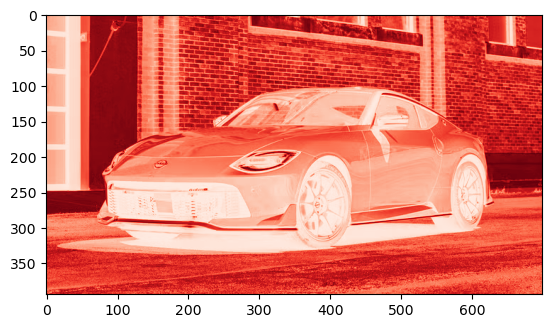

In [9]:
plt.imshow(M[:,:,0],cmap='Reds')
plt.show()

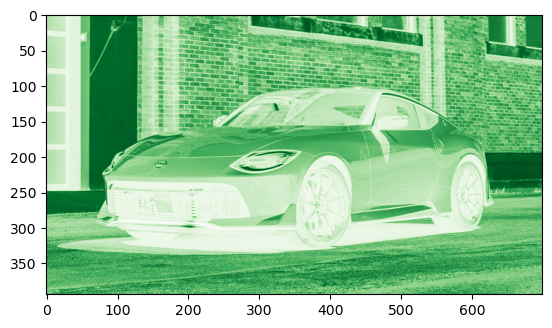

In [10]:
plt.imshow(M[:,:,1],cmap='Greens')
plt.show()

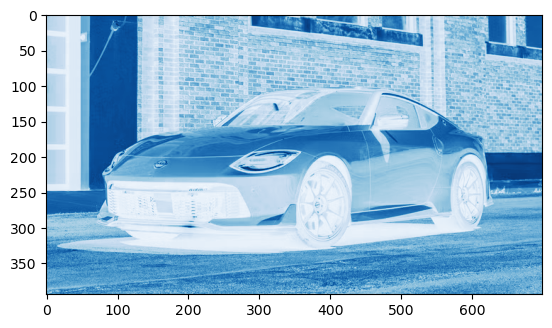

In [11]:
plt.imshow(M[:,:,2],cmap='Blues')
plt.show()

# Splitting RGB Channels

In [12]:
img.mode

'RGB'

In [13]:
red, green, blue = img.split()

In [17]:
zeroed_band = red.point(lambda _: 0)

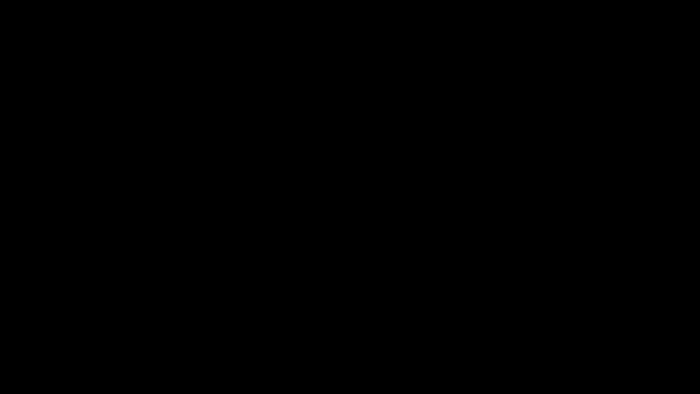

In [18]:
zeroed_band

In [19]:
red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band))

In [20]:
green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band))

In [21]:
blue_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue))

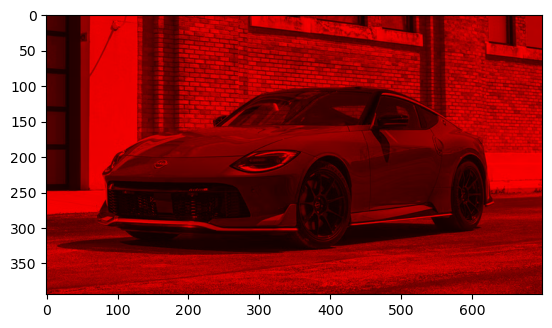

In [22]:
plt.imshow(red_merge)
plt.show()

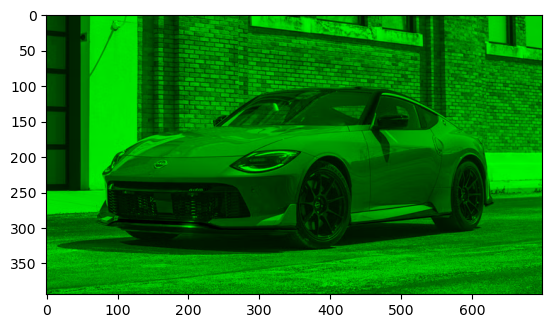

In [23]:
plt.imshow(green_merge)
plt.show()

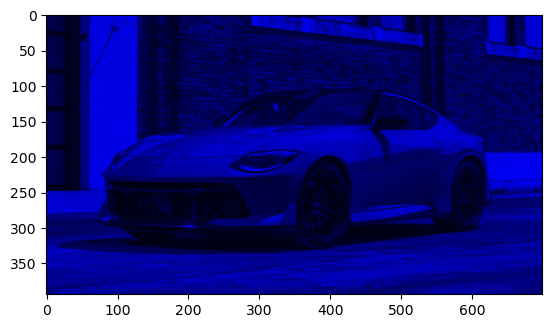

In [24]:
plt.imshow(blue_merge)
plt.show()

# Grayscale and other Channels

In [27]:
cmyk_img = img.convert("CMYK")

In [28]:
cmyk_img.getbands()

('C', 'M', 'Y', 'K')

In [29]:
grayscale_img = img.convert("L")  # Grayscale

In [30]:
grayscale_img.getbands()

('L',)

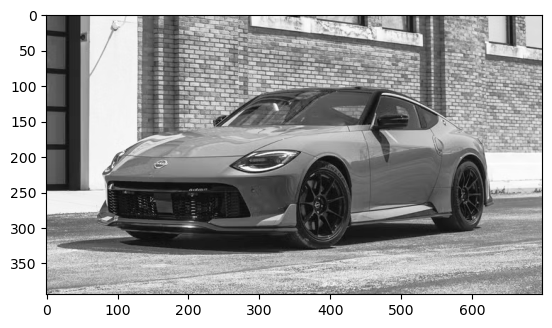

In [31]:
plt.imshow(grayscale_img, cmap='Greys_r')
plt.show()

In [32]:
binary_img = img.convert("1")  # Binary

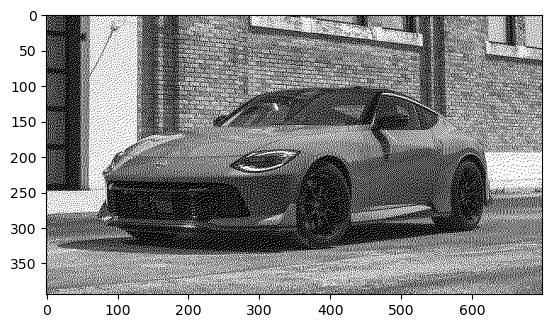

In [33]:
plt.imshow(binary_img)
plt.show()

In [36]:
### Better way to convert Grayscale into Binary

In [34]:
binary_image_real = grayscale_img.point(lambda x: 0 if x<128 else 255, '1')  #binarization 

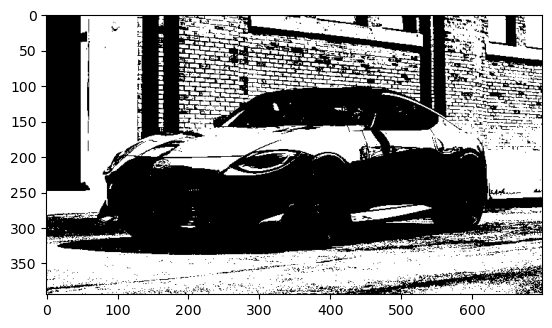

In [35]:
plt.imshow(binary_image_real)
plt.show()

# Filters/Kernels 

#### Syntax:  PIL.ImageFilter.Kernel(size, kernel, scale=None, offset=0) <br>
size – Kernel size, given as (width, height). In the current version, this must be (3, 3) or (5, 5).

In [37]:
from PIL import Image, ImageFilter  

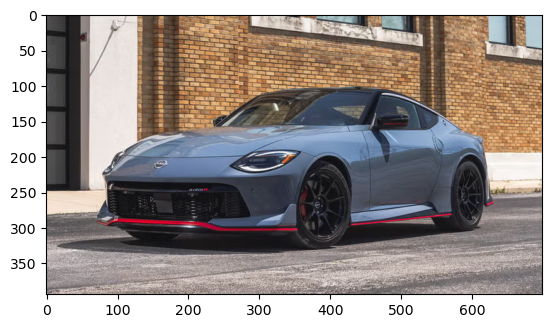

In [39]:
plt.imshow(img)
plt.show()

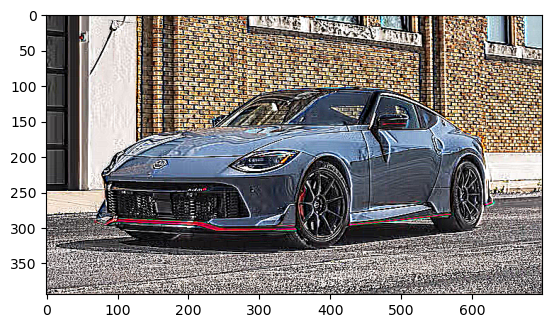

In [38]:
# applying the Kernel filter 
img2 = img.filter(ImageFilter.Kernel((3, 3), 
      (-1, -1, -1, -1, -1, 9, -1, -1, -1), 1, 0))
plt.imshow(img2)
plt.show()

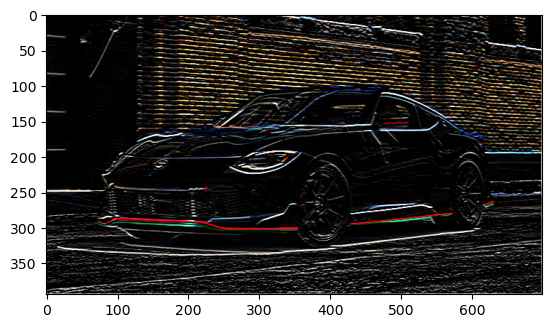

In [40]:
# applying the Kernel filter 
img2 = img.filter(ImageFilter.Kernel((3, 3), 
      (1, 1, 1, 0, 0, 0, -1, -1, -1), 1, 0))
plt.imshow(img2)
plt.show()

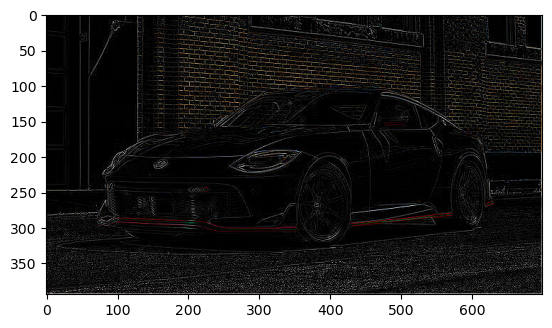

In [41]:
# applying the Kernel filter 
img2 = img.filter(ImageFilter.Kernel((3, 3), 
      (0, 1, 0, 1, -4, 1, 0, 1, 0), 1, 0))
plt.imshow(img2)
plt.show()

### Kernel from the lecture notes

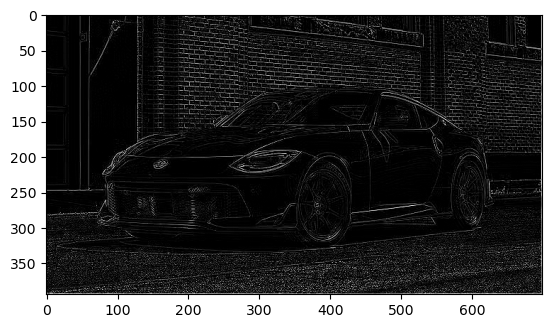

In [42]:
# applying the Kernel filter 
img2 = grayscale_img.filter(ImageFilter.Kernel((3, 3), 
      (0, 1, 0, 1, -4, 1, 0, 1, 0), 1, 0))
plt.imshow(img2,cmap='Greys_r')
plt.show()

# Default/Built-in Filters/Kernels

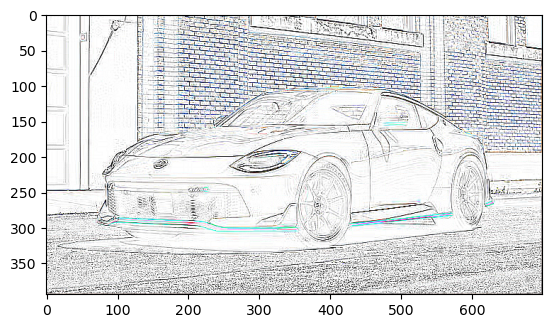

In [43]:
# Apply CONTOUR filter to the image
image_contour = img.filter(filter=ImageFilter.CONTOUR)
plt.imshow(image_contour)
plt.show()

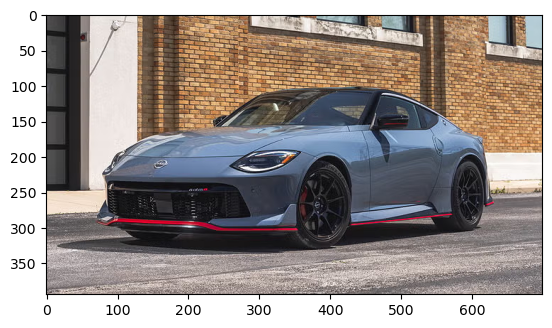

In [44]:
# Apply DETAIL filter to the image
image_detail = img.filter(filter=ImageFilter.DETAIL)
plt.imshow(image_detail)
plt.show()

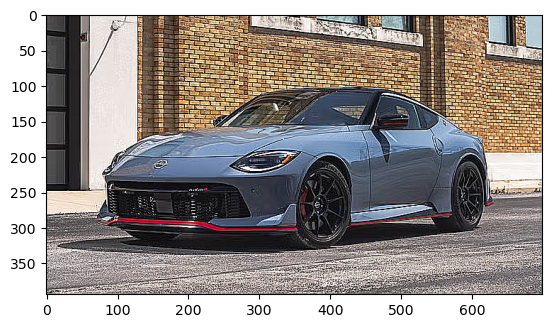

In [45]:
# Apply EDGE_ENHANCE filter to the image
image_edge = img.filter(filter=ImageFilter.EDGE_ENHANCE)
plt.imshow(image_edge)
plt.show()

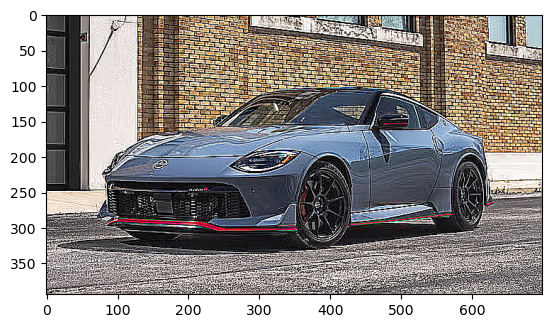

In [46]:
# Apply EDGE_ENHANCE_MORE filter to the image
image_edge_more = img.filter(filter=ImageFilter.EDGE_ENHANCE_MORE)
plt.imshow(image_edge_more)
plt.show()

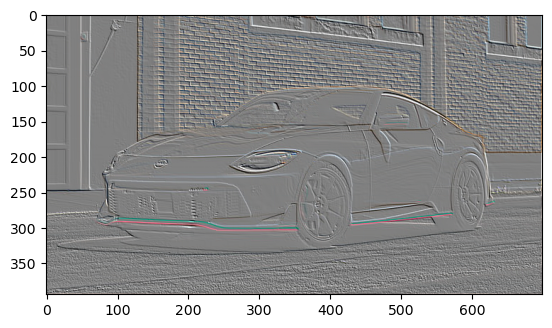

In [47]:
# Apply EMBOSS filter to the image
image_emboss = img.filter(filter=ImageFilter.EMBOSS)
plt.imshow(image_emboss)
plt.show()

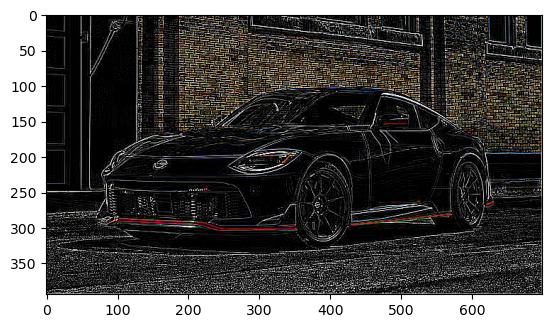

In [48]:
# Apply FIND_EDGES filter to the image
image_edges = img.filter(filter=ImageFilter.FIND_EDGES)
plt.imshow(image_edges)
plt.show()

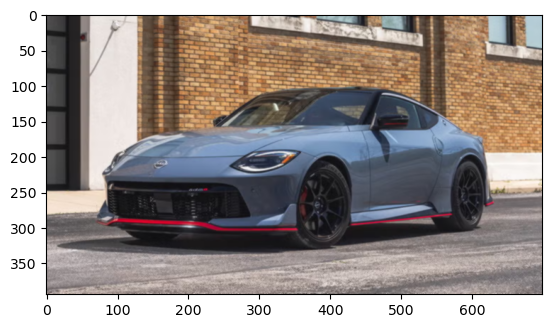

In [49]:
# Apply SMOOTH filter to the image
image_smooth = img.filter(filter=ImageFilter.SMOOTH)
plt.imshow(image_smooth)
plt.show()

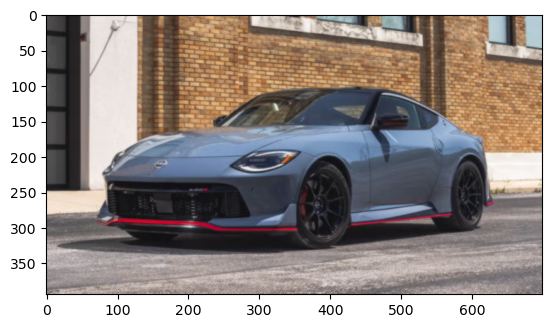

In [50]:
# Apply SMOOTH_MORE filter to the image
image_smooth_more = img.filter(filter=ImageFilter.SMOOTH_MORE)
plt.imshow(image_smooth_more)
plt.show()

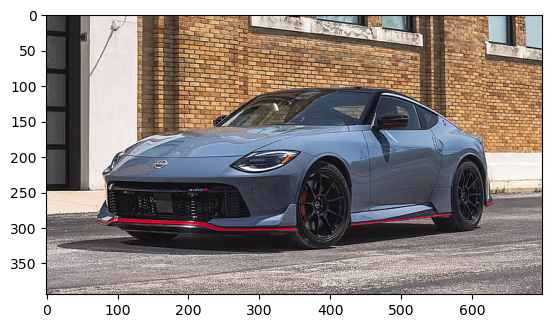

In [51]:
# Apply SHARPEN filter to the image
image_sharpen = img.filter(filter=ImageFilter.SHARPEN)
plt.imshow(image_sharpen)
plt.show()

## Another library to read Image Files - Optional

In [52]:
# Loading the required libraries 
import tensorflow as tf

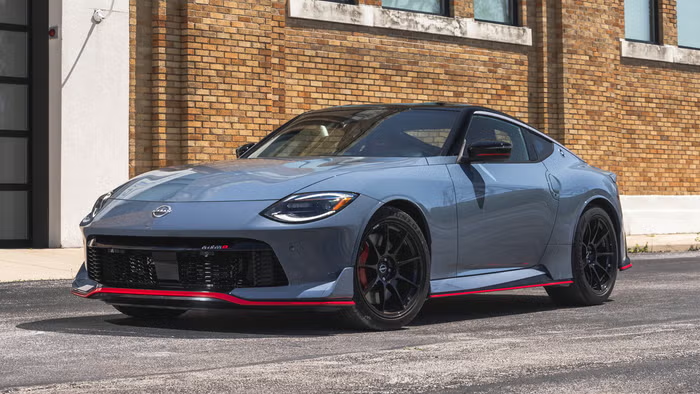

In [53]:
image_path = 'car2.png'
# This return an image in PIL Format 
image_loaded = tf.keras.utils.load_img(image_path) 
# Printing the obtained image. 
image_loaded 

In [54]:
image_loaded.getchannel

<bound method Image.getchannel of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=700x394 at 0x20A33E18250>>

In [55]:
pixels = list(image_loaded.getdata())

In [57]:
# pixels

# Deep Learning

In [58]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [59]:
img = Image.open("data/train/cars/1.jpg")

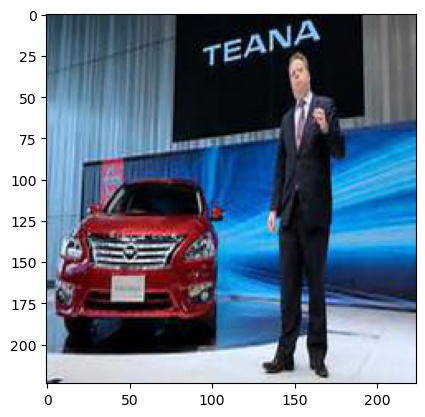

In [60]:
plt.imshow(img)
plt.show()

In [61]:
img.mode

'RGB'

In [62]:
#Get pixel data for each channel
M = np.asarray(img)
M.shape

(224, 224, 3)

In [63]:
### Every image in the dataset is of the size 224*224.
img_width, img_height = 224, 224

Train Data: Train data contains the 200 images of each car and plane, i.e. in total, there are 400 images in the training dataset <br>
Test Data: Test data contains 50 images of each car and plane i.e., includes a total. There are 100 images in the test dataset

In [64]:
### More settings
train_data_dir = 'data/train'
test_data_dir = 'data/test'
nb_train_samples = 400
nb_test_samples = 100
epochs = 10
batch_size = 16

In [66]:
K.image_data_format()

'channels_last'

In [67]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Architecture

- Conv2D is the layer to convolve the image into multiple images using filter/kernel <br>
- Activation is the activation function to enhance the images. <br>
- MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. <br>
- Flatten is used to flatten the dimensions of the image obtained after convolving it. <br> 
- Dense is used to make this a fully connected model and is the hidden layer. (Deep Learning neural network) <br>
- Dropout is used to avoid overfitting on the dataset. <br>
- Dense is the output layer contains only one neuron which decide to which category image belongs. <br>

In [68]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64)) #fully connected deep learning network
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))

### Compiler

Compile function is used here that involve the use of loss, optimizers and metrics. Here loss function used is binary_crossentropy, optimizer used is rmsprop.

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Data Generator

- ImageDataGenerator that rescales the image (normalize the pixel values between 0 and 1), applies shear in some range, zooms the image and does horizontal flipping with the image. This ImageDataGenerator includes all possible orientation of the image. 
- train_datagen.flow_from_directory is the function that is used to prepare data from the train_dataset directory Target_size specifies the target size of the image. 
- test_datagen.flow_from_directory is used to prepare test data for the model and all is similar as above. 
- fit_generator is used to fit the data into the model made above, other factors used are steps_per_epochs tells us about the number of times the model will execute for the training data. 
- epochs tells us the number of times model will be trained in forward and backward pass. 
- validation_data is used to feed the validation/test data into the model. 
- validation_steps denotes the number of validation/test samples.

In [70]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 17s 602ms/step - loss: 0.7997 - accuracy: 0.5950 - val_loss: 0.5213 - val_accuracy: 0.8438
Epoch 2/10
25/25 [==============================] - 14s 561ms/step - loss: 0.5865 - accuracy: 0.7200 - val_loss: 0.4249 - val_accuracy: 0.8750
Epoch 3/10
25/25 [==============================] - 17s 669ms/step - loss: 0.5065 - accuracy: 0.7775 - val_loss: 0.3470 - val_accuracy: 0.8542
Epoch 4/10
25/25 [==============================] - 15s 602ms/step - loss: 0.4425 - accuracy: 0.8250 - val_loss: 0.2841 - val_accuracy: 0.8958
Epoch 5/10
25/25 [==============================] - 15s 581ms/step - loss: 0.4257 - accuracy: 0.8225 - val_loss: 0.3506 - val_accuracy: 0.8229
Epoch 6/10
25/25 [==============================] - 15s 582ms/step - loss: 0.3370 - accuracy: 0.8775 - val_loss: 0.2939 - val_accuracy: 0.8958
Epoch 7/10
25/25 [==============================] - 15s 610m

In [71]:
model.save('car_plane_model.keras')

### Loading the model and make Prediction on new data

In [72]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model('car_plane_model.keras')

In [75]:
image = load_img('data/new/cars/carnew.png', target_size=(224, 224))
# image = load_img('data/new/planes/planenew.png', target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Car"
else:
    out = "1 - Plane"

print("Class (0-Cars , 1-Planes) and prediction is: ", out)

1/1 [==============================] - 0s 35ms/step
Class (0-Cars , 1-Planes) and prediction is:  0 - Car


In [76]:
label[0][0]

1.3126871e-05

In binary classification, keras will only provide probability of second class (which is class 1)